<a href="https://colab.research.google.com/github/ucfilho/SwarmCantStopNow/blob/main/Conference_2021/Serie_Temporal/covid_temporal_series_procedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from skimage import feature
from skimage import measure
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

In [2]:
!gdown --id 1m45STSbR25jWliFqa_1QyUtrL4hZz8j6


Downloading...
From: https://drive.google.com/uc?id=1m45STSbR25jWliFqa_1QyUtrL4hZz8j6
To: /content/caso.csv
214MB [00:01, 176MB/s]


In [3]:
df = pd.read_csv("caso.csv")

In [4]:
df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-09-22,AP,NaN,state,122726,1975,548,True,845731.0,861773.0,16.0,14241.10526,0.0161
1,2021-09-21,AP,NaN,state,122704,1972,547,False,845731.0,861773.0,16.0,14238.55238,0.0161
2,2021-09-20,AP,NaN,state,122677,1970,546,False,845731.0,861773.0,16.0,14235.41930,0.0161
3,2021-09-19,AP,NaN,state,122669,1969,545,False,845731.0,861773.0,16.0,14234.49099,0.0161
4,2021-09-18,AP,NaN,state,122664,1969,544,False,845731.0,861773.0,16.0,14233.91079,0.0161


In [5]:
df_MG = df.loc[df['state'] == 'MG']

In [6]:
df_MG.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1024713,2020-05-24,MG,Águas Vermelhas,city,2,0,5,False,13539.0,13599.0,3101003.0,14.70696,0.0
1024714,2020-05-23,MG,Águas Vermelhas,city,2,0,4,False,13539.0,13599.0,3101003.0,14.70696,0.0
1024715,2020-05-22,MG,Águas Vermelhas,city,2,0,3,False,13539.0,13599.0,3101003.0,14.70696,0.0
1024716,2020-05-21,MG,Águas Vermelhas,city,2,0,2,False,13539.0,13599.0,3101003.0,14.70696,0.0
1024717,2020-05-20,MG,Águas Vermelhas,city,2,0,1,False,13539.0,13599.0,3101003.0,14.70696,0.0


In [10]:
df  = df_MG[['date','deaths']]

In [13]:
df.head(20)

,date,deaths
725963,2021-09-22,54162
725964,2021-09-21,54095
725965,2021-09-20,54085
725966,2021-09-19,54080
725967,2021-09-18,54023
725968,2021-09-17,53971
725969,2021-09-16,53899
725970,2021-09-15,53845
725971,2021-09-14,53732
725972,2021-09-13,53698


In [17]:
df['deaths'].values.shape

(298755,)

In [18]:
df_MG = df.groupby('date')['deaths'].sum().reset_index()

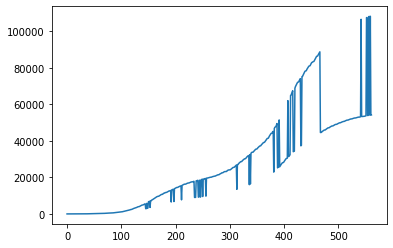

In [22]:
plt.plot(df_MG['deaths'])